In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

In [2]:
dataset = pd.read_csv('/content/Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [5]:
y = y.reshape(len(y) , 1) # converitng to 2d array.


In [6]:
y


array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
# we are training on the whole data;

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)



In [9]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the SVR model on the whole dataset.

In [11]:
# our model is trainned on the scaled values so in prediction we need to pass
# only scaled values to predict the result .

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

# trainning the model
regressor.fit(x,y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### we have trained the model on the scaled values of both the features either dependent or independent .
### when we will predict the result we need to give the scaled value in the predict function .
### also we want our result in the original scale so , we need to apply reverse scaling to the result

In [13]:
# predict func me direct [[6.5]] nii de sakte hai. as the model in trained on the scaled features
# to inverse the scaling we can use -> inverse_transform() function .
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[252789.13921624]])

# visualising the SVR results.

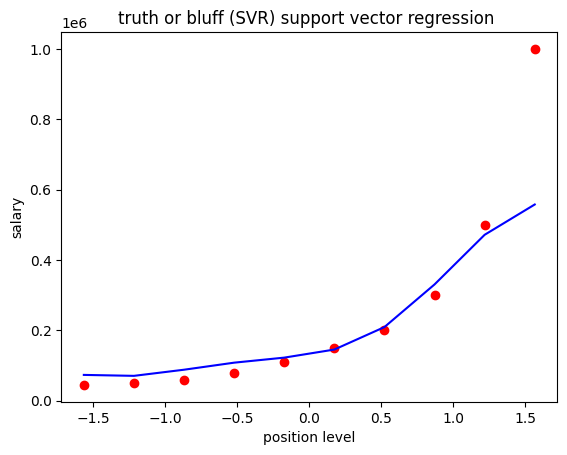

In [15]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y) , color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1))  , color = 'Blue')
plt.title('truth or bluff (SVR) support vector regression ')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()


<ipython-input-16-409201ec9cd3>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


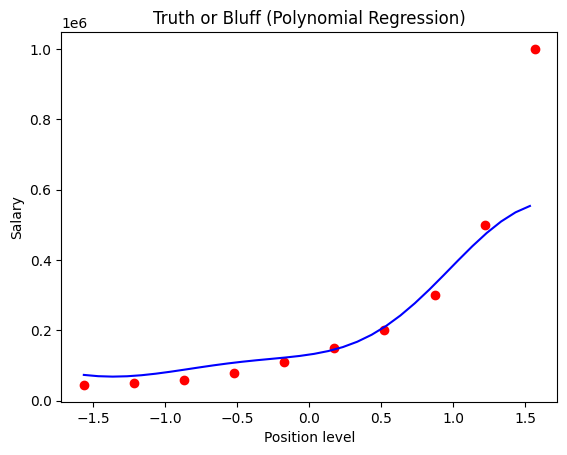

In [16]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
'''#This line creates an array X_grid that contains evenly spaced values from
 the minimum to the maximum of your feature data X (position levels).
 The spacing between these values is 0.1. This denser grid helps create a smoother curve for
  the polynomial regression line.'''

x_grid = x_grid.reshape((len(x_grid), 1))
#This line reshapes the X_grid array into a column vector.
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)) , color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()